**Atualizando a biblioteca para plotagem de gráficos**


In [ ]:
!pip -q install plotly --upgrade

**Importando bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Abrindo um arquivo CSV do drive**

In [20]:
base = pd.read_csv('titanic/train.csv',delimiter=',')

**Você também pode carregar seu arquivo e já selecionar as colunas que desejar... investigue esta função**

In [4]:
#base2 = pd.read_csv('/content/sample_data/restaurante_correto.csv', ';', usecols=['Alternativo', 'Bar'])
#base2

In [21]:
base

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
base.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [22]:
base.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Contando quantidade de instâncias**


In [24]:
Classificação = base.columns[-1]
np.unique(base[Classificação], return_counts=True)

TypeError: '<' not supported between instances of 'float' and 'str'

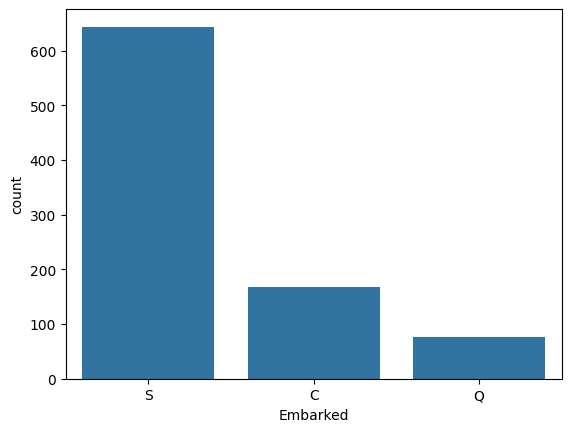

In [25]:
sns.countplot(x = base[Classificação]);

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
cols_label_encode = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 
                     'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

# Remover as colunas que estão vazias ou nulas
cols_com_valores = [col for col in cols_label_encode if base[col].notnull().any()]

# Verificar se todas as colunas estão na base de dados
cols_existentes = [col for col in cols_com_valores if col in base.columns]

# Aplicar LabelEncoder nas colunas existentes
for col in cols_existentes:
    base[col] = LabelEncoder().fit_transform(base[col].astype(str))

print(base.head())

   PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
0            0         0       2   108    1   21      1      0     523   174   
1          111         1       0   190    0   45      1      0     596   199   
2          222         1       2   353    0   27      0      0     669   197   
3          333         1       0   272    0   41      1      0      49   142   
4          444         0       2    15    1   41      0      0     472   211   

   Cabin  Embarked  
0    147         2  
1     81         0  
2    147         2  
3     55         2  
4    147         2  


In [28]:
print(base.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [29]:
base

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,2,108,1,21,1,0,523,174,147,2
1,111,1,0,190,0,45,1,0,596,199,81,0
2,222,1,2,353,0,27,0,0,669,197,147,2
3,333,1,0,272,0,41,1,0,49,142,55,2
4,444,0,2,15,1,41,0,0,472,211,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,874,0,1,548,1,28,0,0,101,21,147,2
887,875,1,0,303,0,16,0,0,14,103,30,2
888,876,0,2,413,0,88,1,2,675,78,147,2
889,878,1,0,81,1,27,0,0,8,103,60,0




>** OneHotEncoder - Agora vamos binarizar atributos não ordinais**

**Contando quantas opções de resposta tem cada atributo**

In [33]:
len(np.unique(base['Pclass']))

3

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [35]:
cols_onehot_encode = ['Pclass']
# Inicializar o OneHotEncoder (sparse_output=False retorna um array denso)
onehot = OneHotEncoder(sparse_output=False)

# Aplicar o OneHotEncoder apenas nas colunas categóricas
df_onehot = onehot.fit_transform(base[cols_onehot_encode])

# Obter os novos nomes das colunas após a codificação
nomes_das_colunas = onehot.get_feature_names_out(cols_onehot_encode)

# Criar um DataFrame com os dados codificados e as novas colunas
df_onehot = pd.DataFrame(df_onehot, columns=nomes_das_colunas)

# Combinar as colunas codificadas com as colunas que não foram transformadas
base_encoded= pd.concat([df_onehot, base.drop(columns=cols_onehot_encode)], axis=1)

In [36]:
base_encoded

,Pclass_0,Pclass_1,Pclass_2,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,0.0,1.0,0,0,108,1,21,1,0,523,174,147,2
1,1.0,0.0,0.0,111,1,190,0,45,1,0,596,199,81,0
2,0.0,0.0,1.0,222,1,353,0,27,0,0,669,197,147,2
3,1.0,0.0,0.0,333,1,272,0,41,1,0,49,142,55,2
4,0.0,0.0,1.0,444,0,15,1,41,0,0,472,211,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,874,0,548,1,28,0,0,101,21,147,2
887,1.0,0.0,0.0,875,1,303,0,16,0,0,14,103,30,2
888,0.0,0.0,1.0,876,0,413,0,88,1,2,675,78,147,2
889,1.0,0.0,0.0,878,1,81,1,27,0,0,8,103,60,0


In [17]:
base_encoded.shape

(12, 14)

**Separar o dataset em variáveis independentes (X_prev) e dependentes (y_classe)**

In [37]:
# Supondo que a última coluna seja o target
X_prev= base_encoded.iloc[:, :-1]
y_classe = base_encoded.iloc[:, -1]

**Método de amostragem Holdout**

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_prev

,Pclass_0,Pclass_1,Pclass_2,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,0.0,0.0,1.0,0,0,108,1,21,1,0,523,174,147
1,1.0,0.0,0.0,111,1,190,0,45,1,0,596,199,81
2,0.0,0.0,1.0,222,1,353,0,27,0,0,669,197,147
3,1.0,0.0,0.0,333,1,272,0,41,1,0,49,142,55
4,0.0,0.0,1.0,444,0,15,1,41,0,0,472,211,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,874,0,548,1,28,0,0,101,21,147
887,1.0,0.0,0.0,875,1,303,0,16,0,0,14,103,30
888,0.0,0.0,1.0,876,0,413,0,88,1,2,675,78,147
889,1.0,0.0,0.0,878,1,81,1,27,0,0,8,103,60


In [40]:
y_classe

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

In [41]:
y_classe.shape

(891,)

In [42]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 42)

In [43]:
X_treino.shape

(712, 13)

In [44]:
X_teste.shape

(179, 13)

In [45]:
X_teste

,Pclass_0,Pclass_1,Pclass_2,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
709,0.0,0.0,1.0,679,1,561,1,88,1,1,189,41,147
439,0.0,1.0,0.0,379,0,447,1,35,0,0,547,3,147
840,0.0,0.0,1.0,824,0,11,1,18,0,0,647,197,147
720,0.0,1.0,0.0,691,1,331,0,72,0,1,155,112,147
39,0.0,0.0,1.0,334,1,589,0,10,1,0,186,8,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,0.0,0.0,1.0,372,0,420,1,14,0,0,657,170,147
773,0.0,0.0,1.0,749,0,235,1,88,0,0,201,172,147
25,0.0,0.0,1.0,178,1,44,0,45,1,5,329,109,147
84,0.0,1.0,0.0,833,1,386,0,14,0,0,637,3,147


In [46]:
y_treino

331    2
733    2
382    2
704    2
813    2
      ..
106    2
270    2
860    2
435    2
102    2
Name: Embarked, Length: 712, dtype: int64

In [47]:
y_teste

709    0
439    2
840    2
720    2
39     0
      ..
433    2
773    0
25     2
84     2
10     2
Name: Embarked, Length: 179, dtype: int64

In [48]:
import pickle

In [50]:
with open('titanic/titanic.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)